In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

### 1) Read the dataset into the notebook.

In [3]:
df = pd.read_excel(r"C:\Users\Asus\Downloads\1356641-ML_Project_Concrete_Strength_Prediction\ML_Projrct_Concrete_Strength_Prediction\Concrete_Data.xls")
df.head(4)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780


### 2) Print the shape of the data.

In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
# Renaming the columns.

df = df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Blast_Fur',
       'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Fly_Ash',
       'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Plasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine', 'Age (day)' : 'Age',
       'Concrete compressive strength(MPa, megapascals) ' : 'Concrete'})

In [7]:
df.head(3)

,Cement,Blast_Fur,Fly_Ash,Water,Plasticizer,Coarse,Fine,Age,Concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


### 3) List out the feature variables and their data-types.

In [8]:
feature_vars = ['Cement', 'Blast_Fur', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse','Fine', 'Age']

In [9]:
df[feature_vars].dtypes

Cement         float64
Blast_Fur      float64
Fly_Ash        float64
Water          float64
Plasticizer    float64
Coarse         float64
Fine           float64
Age              int64
dtype: object

### 4) List out response variable and its data type.

In [10]:
# Checking response variable data_type.

df['Concrete'].dtypes

dtype('float64')

### 5) List out response variable and its data type.

In [11]:
# Checking Null_values:

df.isnull().sum()

Cement         0
Blast_Fur      0
Fly_Ash        0
Water          0
Plasticizer    0
Coarse         0
Fine           0
Age            0
Concrete       0
dtype: int64

### 6) Check for outliers.

In [12]:
# Checking Outliers:

cols = ['Cement', 'Blast_Fur', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse','Fine', 'Age','Concrete']
q1 = df[cols].quantile(0.25)
q3 = df[cols].quantile(0.75)
iqr = q3 - q1
iqr

Cement         157.625000
Blast_Fur      142.950000
Fly_Ash        118.270000
Water           27.100000
Plasticizer     10.160000
Coarse          97.400000
Fine            93.050000
Age             49.000000
Concrete        22.429171
dtype: float64

### 7) Treat outliers. What is your strategy? What other strategies can be used?

In [13]:
# Treating Null_values:

df = df[~((df[cols] < (q1 - 1.5* iqr)) | (df[cols] > (q3 + 1.5 * iqr))).any(axis = 1)]
df

,Cement,Blast_Fur,Fly_Ash,Water,Plasticizer,Coarse,Fine,Age,Concrete
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [14]:
((1030 - 945) /100)*100

85.0

### 8) Perform univariate analysis (be as creative as possible in your analysis).

<AxesSubplot:xlabel='Age', ylabel='Density'>

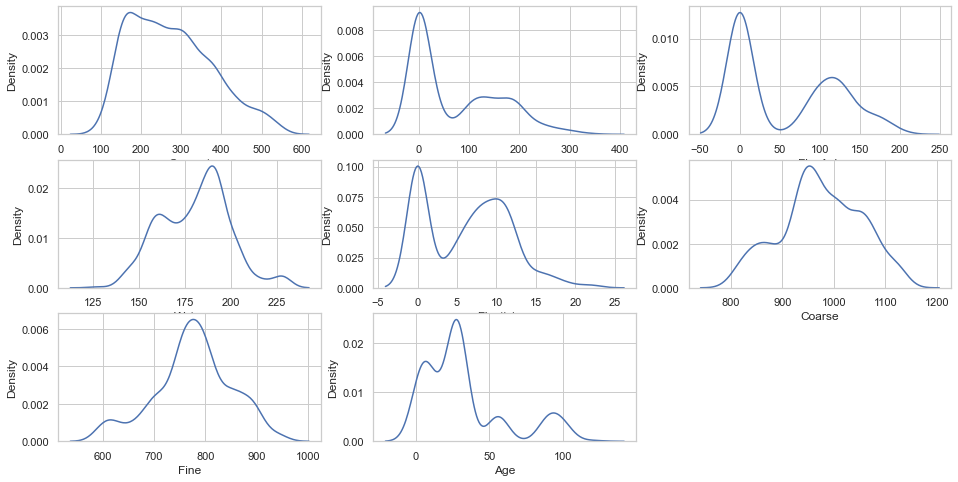

In [15]:
plt.figure(figsize = (16,8))
plt.subplot(3,3,1)
sns.kdeplot(df.Cement)
plt.subplot(3,3,2)
sns.kdeplot(df.Blast_Fur)
plt.subplot(3,3,3)
sns.kdeplot(df.Fly_Ash)
plt.subplot(3,3,4)
sns.kdeplot(df.Water)
plt.subplot(3,3,5)
sns.kdeplot(df.Plasticizer)
plt.subplot(3,3,6)
sns.kdeplot(df.Coarse)
plt.subplot(3,3,7)
sns.kdeplot(df.Fine)
plt.subplot(3,3,8)
sns.kdeplot(df.Age)

####  When we observe the above plotted graphs some are normally distributed and some other are positively skewed.
####  If we remove much outliers then we will loose the data, as experts said that the outliers are less than 5% then we will remove otherwise their will be inconsistency in data.

<AxesSubplot:xlabel='Age'>

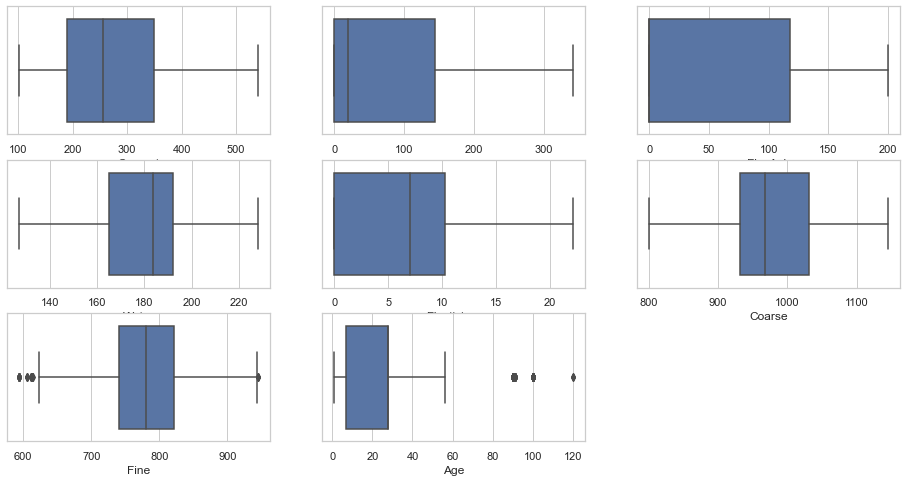

In [16]:
plt.figure(figsize = (16,8))
plt.subplot(3,3,1)
sns.boxplot(df.Cement)
plt.subplot(3,3,2)
sns.boxplot(df.Blast_Fur)
plt.subplot(3,3,3)
sns.boxplot(df.Fly_Ash)
plt.subplot(3,3,4)
sns.boxplot(df.Water)
plt.subplot(3,3,5)
sns.boxplot(df.Plasticizer)
plt.subplot(3,3,6)
sns.boxplot(df.Coarse)
plt.subplot(3,3,7)
sns.boxplot(df.Fine)
plt.subplot(3,3,8)
sns.boxplot(df.Age)

<AxesSubplot:>

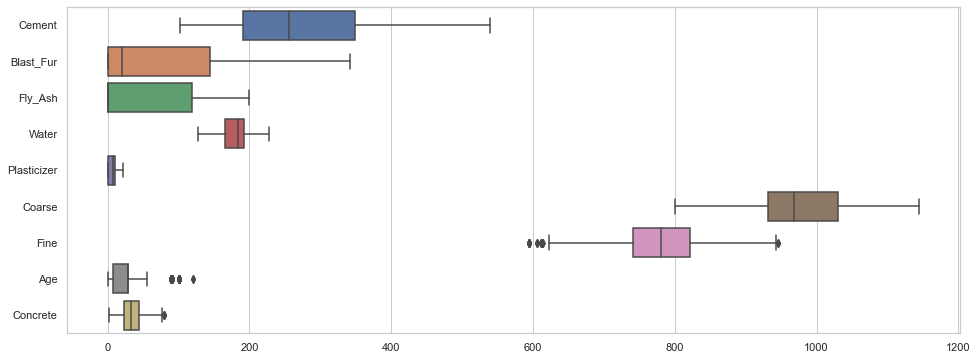

In [17]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df,orient = 'h')

### 9) Perform univariate analysis (be as creative as possible in your analysis).

<AxesSubplot:>

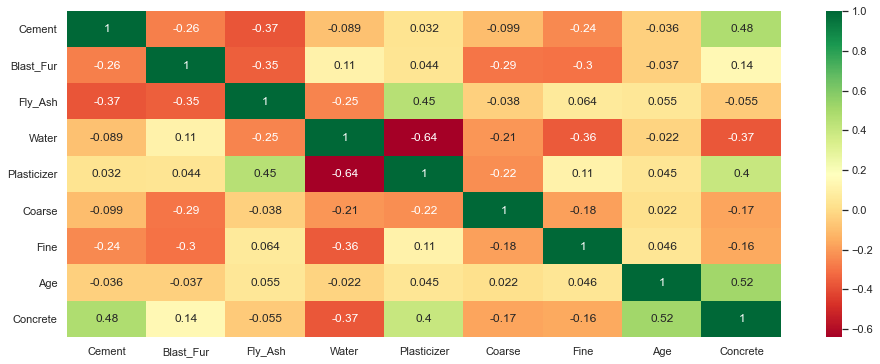

In [18]:
plt.figure(figsize = (16,6))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn')

#### -> When we see the above graph some are highly correlated and some other are negatively correlated.
        The one with green color are positively correlated, and with red color are negatively correlated.
        Among all those concrete having higher correlation with most of the columns.

### 10) What is the type of machine learning problem at hand? (Supervised or Unsupervised?) Why?

At hand we are having supervised machine learning problem. 
Supervised learning requires that the algorithms possible outputs are already known and that the data used to train the algorithm is already labelled with correct.

### 11) What is the category of the machine learning problem at hand? (Classification or Regression?) Why?

 As we see the dataset, it is completly numerical. So, we choose regression learning algorithms.

### 12) Pick each of the algorithm and perform the below steps:

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [20]:
feature_vars = ['Cement', 'Blast_Fur', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse','Fine', 'Age']
X = df[feature_vars]
y = df['Concrete']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X.shape

(941, 8)

In [23]:
y.shape

(941,)

### a) Linear Regression:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
print('LinearRegression test result:')
print('MSE: % 2f' % mean_squared_error(y_test,y_pred_test))
print('R Squared:%2f'% r2_score(y_test,y_pred_test))

LinearRegression test result:
MSE:  67.190629
R Squared:0.741549


In [28]:
print('LinearRegression train result:')
print('MSE: % 2f' % mean_squared_error(y_train,y_pred_train))
print('R Squared:%2f'% r2_score(y_train,y_pred_train))

LinearRegression train result:
MSE:  62.507927
R Squared:0.775737


-> In LinearRegression the Train result R_Squared score is more. So, the model fits to the training dataset.

In [29]:
lin_cv_5 = cross_val_score(reg,X_train,y_train,cv=5).mean()
print('LinearRegression Crossval 5 :',(lin_cv_5)*100)

LinearRegression Crossval 5 : 76.73965237914221


In [30]:
lin_cv_10 = cross_val_score(reg,X_train,y_train,cv=10).mean()
print('LinearRegression Crossval 10 :',(lin_cv_10)*100)

LinearRegression Crossval 10 : 76.40788171147555


### b) Lasso Regression:

In [31]:
from sklearn.linear_model import Lasso
lassoR = Lasso(alpha=1)
lassoR.fit(X_train, y_train)

Lasso(alpha=1)

In [32]:
y_test_lasso = lassoR.predict(X_test)
y_train_lasso = lassoR.predict(X_train)

In [33]:
print('LassoRegression test result:')
print('MSE train: % 2f' % mean_squared_error(y_test,y_test_lasso))
print('R Squared train:%2f'% r2_score(y_test,y_test_lasso))

LassoRegression test result:
MSE train:  68.128806
R Squared train:0.737941


In [34]:
print('LassoRegression train result:')
print('MSE train: % 2f' % mean_squared_error(y_train,y_train_lasso))
print('R Squared train:%2f'% r2_score(y_train,y_train_lasso))

LassoRegression train result:
MSE train:  62.570564
R Squared train:0.775512


-> In LassoRegression the Train result R_Squared score is more. So, the model fits to the training dataset.

In [35]:
las_cv_5 = cross_val_score(lassoR,X_train,y_train,cv=5).mean()
print('LassoReg Crossval 5 :',(las_cv_5)*100)

LassoReg Crossval 5 : 76.74674431997784


In [36]:
las_cv_10 = cross_val_score(lassoR,X_train,y_train,cv=10).mean()
print('LassoReg Crossval 10',(las_cv_10)*100)

LassoReg Crossval 10 76.40418956699023


### c) Ridge Regression:

In [37]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=1)
ridgeR.fit(X_train, y_train)

Ridge(alpha=1)

In [38]:
y_test_ridge = ridgeR.predict(X_test)
y_train_ridge = ridgeR.predict(X_train)

In [39]:
print('RidgeRegression test result:')
print('MSE train: % 2f' % mean_squared_error(y_test,y_test_ridge))
print('R Squared train:%2f'% r2_score(y_test,y_test_ridge))

RidgeRegression test result:
MSE train:  67.190677
R Squared train:0.741549


In [40]:
print('RidgeRegression train result:')
print('MSE train: % 2f' % mean_squared_error(y_train,y_train_ridge))
print('R Squared train:%2f'% r2_score(y_train,y_train_ridge))

RidgeRegression train result:
MSE train:  62.507927
R Squared train:0.775737


-> In RidgeRegression the Train result R_Squared score is more. So, the model fits to the training dataset.

In [41]:
rid_cv_5 = cross_val_score(ridgeR,X_train,y_train,cv=5).mean()
print('Ridgereg Crossval 5 :',(rid_cv_5)*100)

Ridgereg Crossval 5 : 76.73966936739859


In [42]:
rid_cv_10 = cross_val_score(ridgeR,X_train,y_train,cv=10).mean()
print('Ridgereg crossval 10 :',(rid_cv_10)*100)

Ridgereg crossval 10 : 76.40790393162347


### d) Decision Tree Regressor:

In [43]:
from sklearn.tree import DecisionTreeRegressor
feature_vars = ['Cement', 'Blast_Fur', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse','Fine', 'Age']
X = df[feature_vars]
y = df['Concrete']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_dt = DecisionTreeRegressor(random_state = 0)
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
y_pred_test = model_dt.predict(X_test)
y_pred_train = model_dt.predict(X_train)

In [45]:
print('DecisionTree test result:')
print('MSE: % 2f' % mean_squared_error(y_test,y_pred_test))
print('R Squared:%2f'% r2_score(y_test,y_pred_test))

DecisionTree test result:
MSE:  66.057190
R Squared:0.745909


In [46]:
print('DecisionTree train result:')
print('MSE train: % 2f' % mean_squared_error(y_train,y_pred_train))
print('R Squared train:%2f'% r2_score(y_train,y_pred_train))

DecisionTree train result:
MSE train:  0.773756
R Squared train:0.997224


-> In DecisionTreeRegression the Train result R_Squared score is more. So, the model fits to the training dataset.

In [47]:
dt_cv_5 = cross_val_score(model_dt,X_train,y_train,cv=5).mean()
print('DecisionTree Crossval 5 :',(dt_cv_5)*100)

DecisionTree Crossval 5 : 84.69468214675786


In [48]:
dt_cv_10 = cross_val_score(model_dt,X_train,y_train,cv=10).mean()
print('DecisionTree Crossval 10 :',(dt_cv_10)*100)

DecisionTree Crossval 10 : 84.60716967905644


### e) RandomForest Regression:

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
feature_vars = ['Cement', 'Blast_Fur', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse','Fine', 'Age']
X = df[feature_vars]
y = df['Concrete']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_rf = RandomForestRegressor(random_state = 0)
model_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [51]:
y_pred_test = model_rf.predict(X_test)
y_pred_train = model_rf.predict(X_train)

In [52]:
print('RandomForest test result:')
print('MSE: % 2f' % mean_squared_error(y_test,y_pred_test))
print('R Squared:%2f'% r2_score(y_test,y_pred_test))

RandomForest test result:
MSE:  32.298417
R Squared:0.875763


In [53]:
print('RandomForest train result:')
print('MSE: % 2f' % mean_squared_error(y_train,y_pred_train))
print('R Squared:%2f'% r2_score(y_train,y_pred_train))

RandomForest train result:
MSE:  3.941204
R Squared:0.985860


-> In RandomForestRegression the Train result R_Squared score is more. So, the model fits to the training dataset.

In [54]:
rad_cv_5 = cross_val_score(model_rf,X_train,y_train,cv=5).mean()
print('RandTree Crossval 5 :',(rad_cv_5)*100)

RandTree Crossval 5 : 89.73396759452199


In [55]:
rad_cv_10 = cross_val_score(model_rf,X_train,y_train,cv=10).mean()
print('RandTree Crossval 10 :',(rad_cv_10)*100)

RandTree Crossval 10 : 90.83665576415282


### f) KNN Regressor:

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
feature_vars = ['Cement', 'Blast_Fur', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse','Fine', 'Age']
X = df[feature_vars]
y = df['Concrete']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_knn = KNeighborsRegressor(n_neighbors = 2)
model_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [58]:
y_pred_test = model_knn.predict(X_test)
y_pred_train = model_knn.predict(X_train)

In [59]:
print('KNN test result:')
print('MSE: % 2f' % mean_squared_error(y_test,y_pred_test))
print('R Squared:%2f'% r2_score(y_test,y_pred_test))

KNN test result:
MSE:  106.872965
R Squared:0.588910


In [60]:
print('KNN train result:')
print('MSE: % 2f' % mean_squared_error(y_train,y_pred_train))
print('R Squared:%2f'% r2_score(y_train,y_pred_train))

KNN train result:
MSE:  20.702446
R Squared:0.925725


-> In KNNRegression the Train result R_Squared score is more. So, the model fits to the training dataset.

In [61]:
knn_cv_5 = cross_val_score(model_knn,X_train,y_train,cv=5).mean()
print('knnreg Crossval 5 :',(knn_cv_5)*100)

knnreg Crossval 5 : 67.08305275944915


In [62]:
knn_cv_10 = cross_val_score(model_knn,X_train,y_train,cv=10).mean()
print('knnreg Crossval 10 :',(knn_cv_10)*100)

knnreg Crossval 10 : 68.44448120024376


### g) SVM Regressor:

In [63]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
feature_vars = ['Cement', 'Blast_Fur', 'Fly_Ash', 'Water', 'Plasticizer', 'Coarse','Fine', 'Age']
X = df[feature_vars]
y = df['Concrete']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model_svm = make_pipeline(StandardScaler(), SVR(C = 1.0, epsilon = 0.2))
model_svm.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [65]:
y_pred_test = model_svm.predict(X_test)
y_pred_train = model_svm.predict(X_train)

In [66]:
print('SVM test result:')
print('MSE: % 2f' % mean_squared_error(y_test,y_pred_test))
print('R Squared:%2f'% r2_score(y_test,y_pred_test))

SVM test result:
MSE:  77.000019
R Squared:0.703817


In [67]:
print('SVM train result:')
print('MSE: % 2f' % mean_squared_error(y_train,y_pred_train))
print('R Squared:%2f'% r2_score(y_train,y_pred_train))

SVM train result:
MSE:  67.392216
R Squared:0.758213


-> In SVMRegression the Train result R_Squared score is more. So, the model fits to the training dataset.

In [68]:
svm_cv_5 = cross_val_score(model_svm,X_train,y_train,cv=5).mean()
print('Svmreg Crossval 5 :',(svm_cv_5)*100)

Svmreg Crossval 5 : 69.83805191500142


In [69]:
svm_cv_10 = cross_val_score(model_svm,X_train,y_train,cv=10).mean()
print('Svmreg Crossval 10 :',(svm_cv_10)*100)

Svmreg Crossval 10 : 71.47349025377322


### Plotting Feature Importances:

Text(0.5, 0, 'Random Forest')

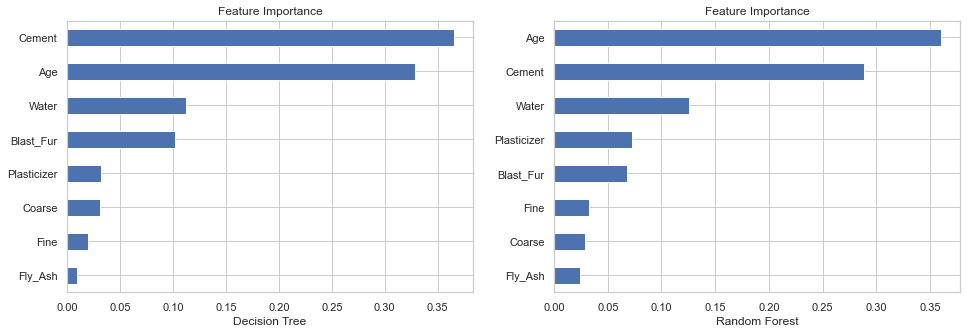

In [70]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
model_dt = pd.Series(model_dt.feature_importances_, index=feature_vars).sort_values()
model_dt.plot(kind = 'barh',title = 'Feature Importance')
plt.xlabel('Decision Tree')
plt.subplot(1,2,2)
model_rf = pd.Series(model_rf.feature_importances_, index=feature_vars).sort_values()
model_rf.plot(kind='barh',title = 'Feature Importance')
plt.xlabel('Random Forest')

### Conclusion:

1) RandomForest fits the model best for testing data with highest(r_squared) value of 0.87

2) DecisionTree fits the model best for training data with highest(r_squared) value of 0.99

3) RandomForest is the best model among all with highest cross_validation_5 accuracy of 89% 

4) RandomForest is the best model among all with highest cross_validation_10 accuracy of 90% 

Finally, i conclude that the dataset is best fit for training dataset because of the decision tree having highest r_squared value of 0.99.
When comes to the best algorithm, among all RandomForest is the best algorithm  having an accuracy of 90%.